In [120]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
from random import random
import numpy as np
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude, NumberOfPoints, ComplexPolynomial, PersistenceLandscape, HeatKernel, Silhouette, BettiCurve, PairwiseDistance, ForgetDimension
from gtda.plotting import plot_point_cloud, plot_heatmap, plot_diagram



# Persistence Diagrams for Circles with different noise

In [121]:
def sample_point(radius, std = 0.05):
    theta = random() * 2 * pi
    noise = [np.random.normal(0, std),np.random.normal(0, std)]
    return cos(theta) * radius + noise[0], sin(theta) * radius + noise[1]

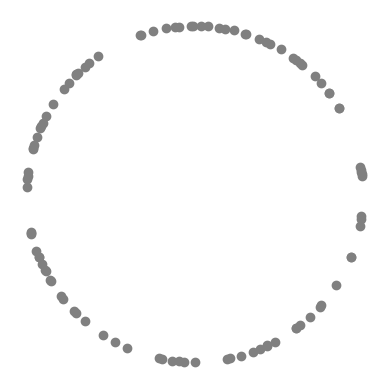

In [138]:
# Very little noise
point_cloud = [sample_point(radius=1, std = 0.001) for _ in range(100)]

plt.scatter(*zip(*point_cloud), c="grey")
plt.gca().set_aspect('equal') # Set axes to equal scaling
plt.axis('off')
plt.savefig("Little_noise.png")
plt.show()

In [139]:
homology_dimensions = [0, 1, 2]

# We will use a Vietoris Rips filtrations
persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=10
)

point_cloud_array = np.array([list(t) for t in point_cloud])

persistence_diagram1 = persistence.fit_transform(point_cloud_array[None, :, :])

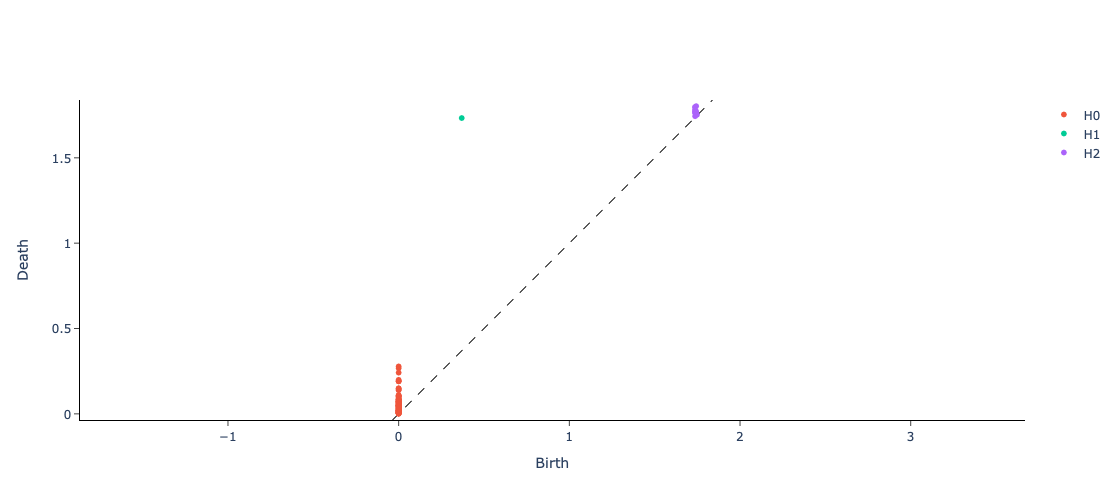

In [140]:
persistence.plot(persistence_diagram1)

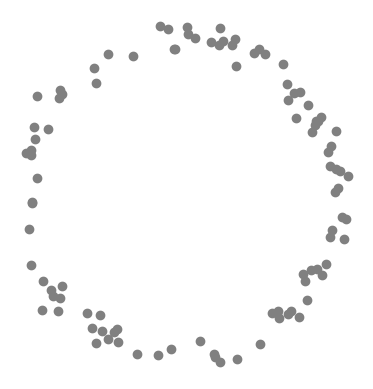

In [141]:
# Medium amount of noise
point_cloud = [sample_point(radius=1, std = 0.05) for _ in range(100)]

plt.scatter(*zip(*point_cloud), c="grey")
plt.gca().set_aspect('equal') # Set axes to equal scaling
plt.axis('off')
plt.savefig("Medium_noise.png")
plt.show()

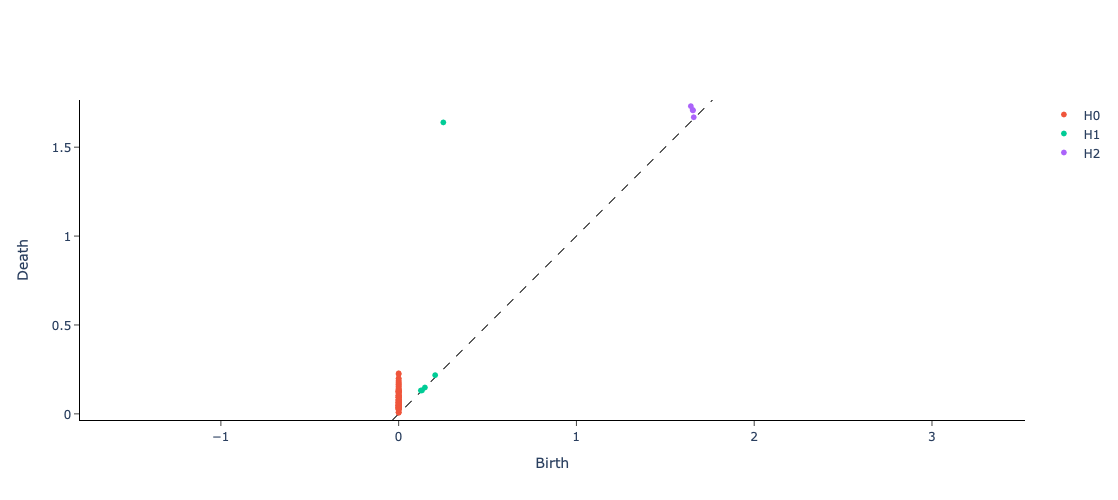

In [142]:
point_cloud_array = np.array([list(t) for t in point_cloud])

persistence_diagram2 = persistence.fit_transform(point_cloud_array[None, :, :])
persistence.plot(persistence_diagram2)

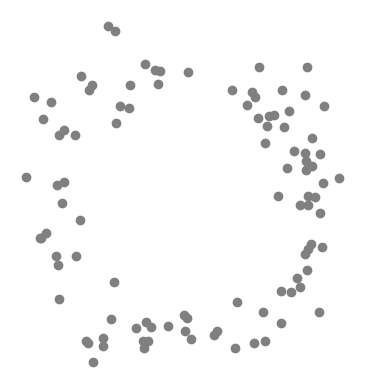

In [143]:
# Large amount of noise
point_cloud = [sample_point(radius=1, std = 0.15) for _ in range(100)]

plt.scatter(*zip(*point_cloud), c="grey")
plt.gca().set_aspect('equal') # Set axes to equal scaling
plt.axis('off')
plt.savefig("Much_noise.png")
plt.show()

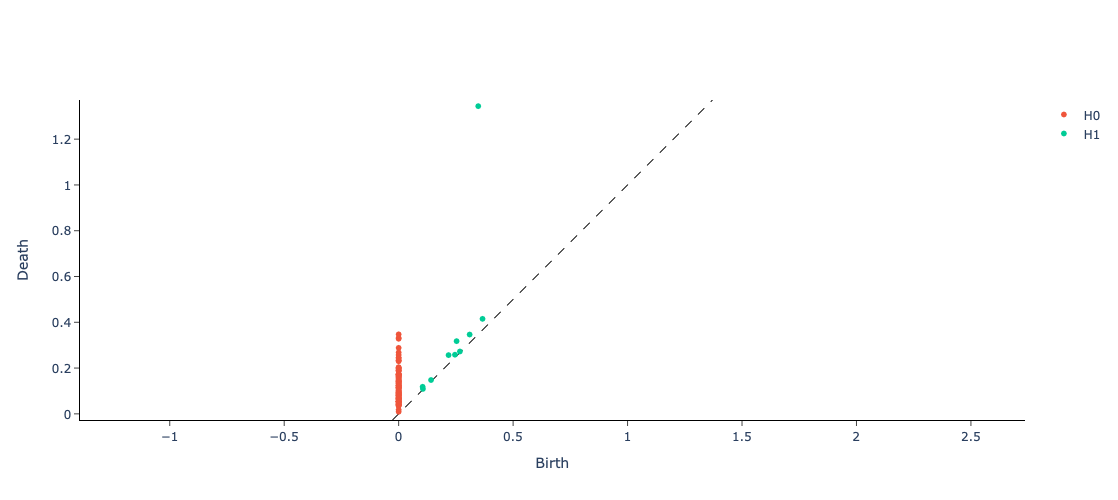

In [144]:
point_cloud_array = np.array([list(t) for t in point_cloud])

persistence_diagram3 = persistence.fit_transform(point_cloud_array[None, :, :])
persistence.plot(persistence_diagram3)

# Persistence Landscapes

In [145]:
PL = PersistenceLandscape()

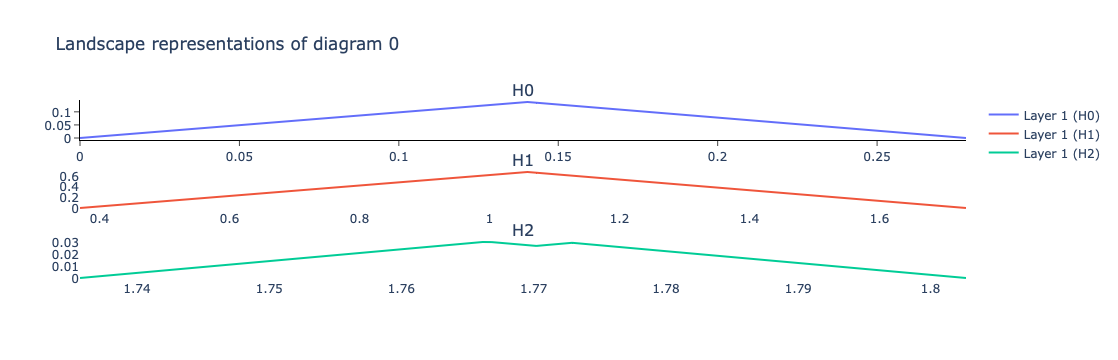

In [146]:
persistence_landscape1 = PL.fit_transform(persistence_diagram1)

PL.plot(persistence_landscape1)

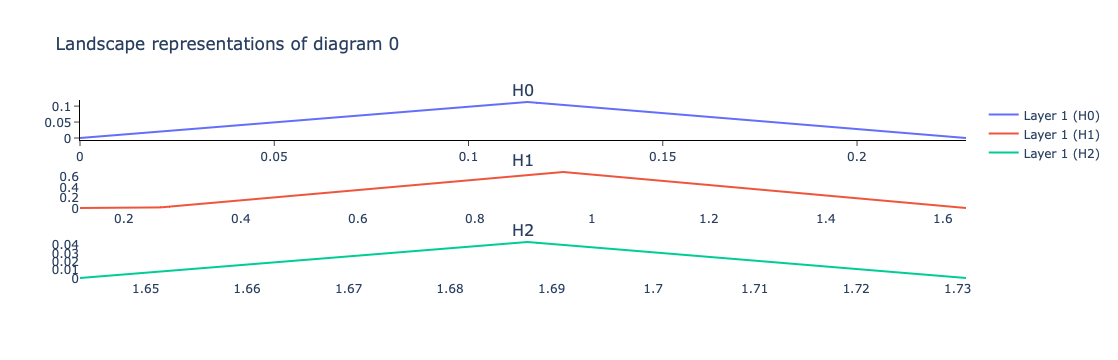

In [147]:
persistence_landscape2 = PL.fit_transform(persistence_diagram2)

PL.plot(persistence_landscape2)

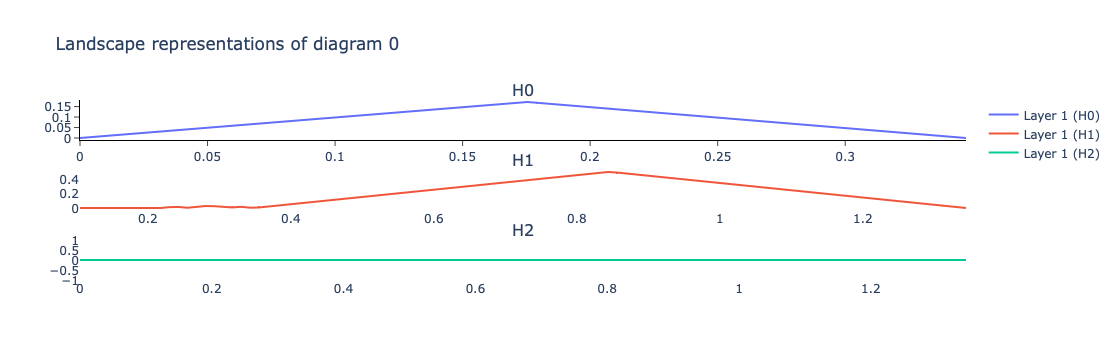

In [148]:
persistence_landscape3 = PL.fit_transform(persistence_diagram3)

PL.plot(persistence_landscape3)